# this notebook will test basic Autoregression predictions as well as the already built in simpleRNN 

# import

In [ ]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# load/create the data

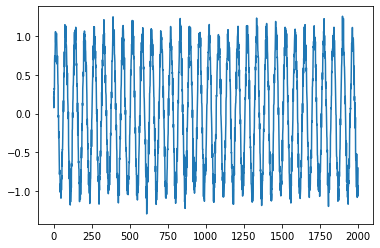

In [123]:
# first test will use generated sine wave with some noise
data = np.sin(0.1 * np.arange(2000)) + np.random.randn(2000) * 0.1
plt.plot(data)
plt.show()

# prepare data

In [181]:
'''
to use data for time series prediction it should be in shame N x T x D WHERE:

N number of samples
T time steps to use/ past data
D number of features on each time step

'''

# note : to make x/y pair for example it T=10 then from data[0:10]are x and data[10] is y then increment by one and so on
features = []
labels = []
T= 4
for i in range(len(data)- T):
  x = data[i:i+T]
  y = data[i+T]
  features.append(x)
  labels.append(y)

features = np.array(features)
labels = np.array(labels)
labels = labels.reshape(-1,1)

print(f'features shape : {features.shape}')
print(f'labels shape : {labels.shape}')

  


features shape : (1996, 4)
labels shape : (1996, 1)


# train basic linear regression model

In [182]:
backend.clear_session() 
i = Input(shape=T)
x = Dense(1)(i) # dense layer without activation(defaul) means regression problem

model = Model(i,x)
model.compile(optimizer=Adam(lr=0.1),loss='mse')
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


# train the model

In [183]:
h = model.fit(features[0:1200],labels[0:1200], epochs=80, validation_data=(features[1200:],labels[1200:]))

Epoch 1/80
38/38 [==============================] - 0s 5ms/step - loss: 0.3965 - val_loss: 0.0362
Epoch 2/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0413 - val_loss: 0.0291
Epoch 3/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 0.0302
Epoch 4/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.0270
Epoch 5/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.0265
Epoch 6/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0212
Epoch 7/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0240 - val_loss: 0.0253
Epoch 8/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0225
Epoch 9/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0240 - val_loss: 0.0221
Epoch 10/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.0214
Epoch 11/80
38/38 [

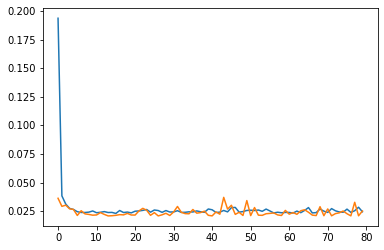

In [184]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

# Make prediction using correct and wrong methods.


### wrong prediction method is using correct validation data to make predictions
### whilst correct method is taking the previous prediction and considering it as x(t-1)


In [185]:
# "Wrong" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input

while len(predictions) < len(targets):
  feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  i += 1

  predictions.append(pred)

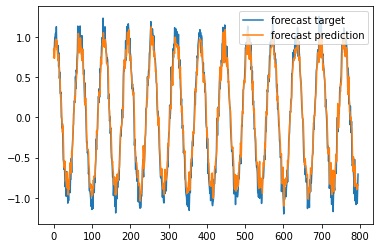

In [186]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()

In [187]:
# "right" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input
feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
# feat will be change to add the prediction as we loop ex feat = [1,2,3] >- pred=5. ==> feat= [2,3,5] and so on

while len(predictions) < len(targets):
  
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  predictions.append(pred)
  # shift left and replace oldest element by prediction
  feat = np.roll(feat,-1)
  feat[-1] = pred # oldest element will be last after shifting
  

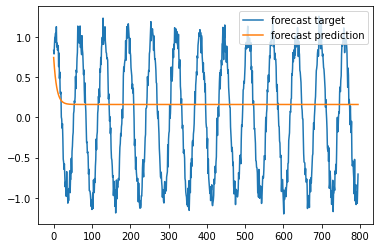

In [188]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()

# new model using simple RNN

In [189]:
# new model using simple RNN
backend.clear_session() 
i = Input(shape=(T,1))
x = SimpleRNN(10,activation='tanh',return_sequences=True)(i) 
x = SimpleRNN(1,activation='tanh',return_sequences=True)(x) 
#x = Dense(1)(x) # dense layer without activation(defaul) means regression problem

model = Model(i,x)
model.compile(optimizer=Adam(lr=0.01),loss='mse')
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4, 1)]            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 4, 10)             120       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 4, 1)              12        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________
None


In [190]:
h = model.fit(features[0:1200],labels[0:1200], epochs=80, validation_data=(features[1200:],labels[1200:]))

Epoch 1/80
38/38 [==============================] - 2s 11ms/step - loss: 0.1648 - val_loss: 0.0594
Epoch 2/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0581 - val_loss: 0.0579
Epoch 3/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0580 - val_loss: 0.0583
Epoch 4/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0624 - val_loss: 0.0579
Epoch 5/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0572 - val_loss: 0.0586
Epoch 6/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0599 - val_loss: 0.0570
Epoch 7/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0581 - val_loss: 0.0567
Epoch 8/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0596 - val_loss: 0.0578
Epoch 9/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0577 - val_loss: 0.0565
Epoch 10/80
38/38 [==============================] - 0s 4ms/step - loss: 0.0600 - val_loss: 0.0565
Epoch 11/80
38/38 

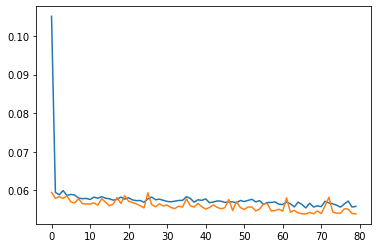

In [191]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

#Make prediction using correct and wrong methods.

####wrong prediction method is using correct validation data to make predictions

####whilst correct method is taking the previous prediction and considering it as x(t-1)

In [192]:
# "Wrong" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input

while len(predictions) < len(targets):
  feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  i += 1

  predictions.append(pred)

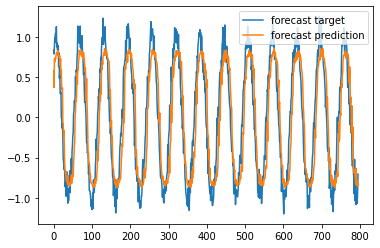

In [193]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()

In [194]:
# "right" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input
feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
# feat will be change to add the prediction as we loop ex feat = [1,2,3] >- pred=5. ==> feat= [2,3,5] and so on

while len(predictions) < len(targets):
  
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  predictions.append(pred)
  # shift left and replace oldest element by prediction
  feat = np.roll(feat,-1)
  feat[-1] = pred # oldest element will be last after shifting
  

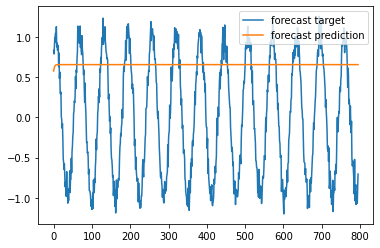

In [195]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()